In [ ]:
import numpy as np #linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/Wine Data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic acid']
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

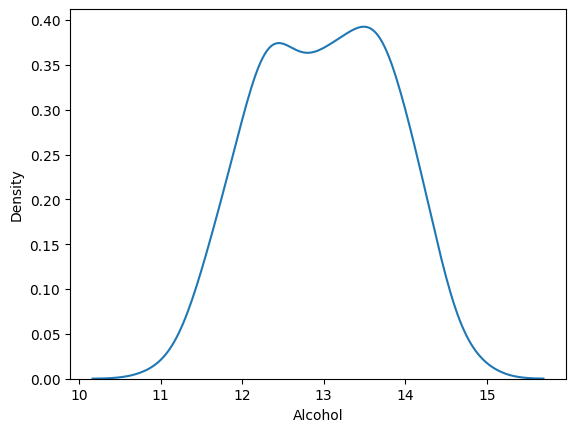

In [5]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

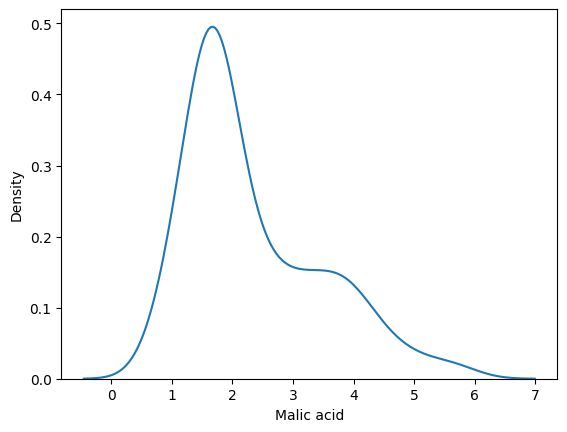

In [6]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

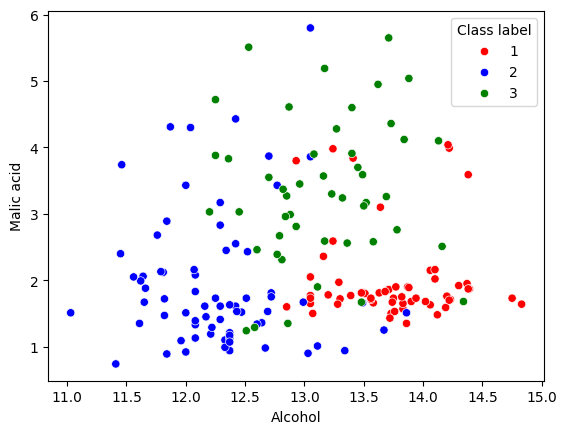

In [ ]:
color_dict = {1:'red',3:'green',2:'blue'}
sns.scatterplot(x = df['Alcohol'],y = df['Malic acid'],hue=df['Class label'],palette=color_dict)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Class label',axis = 1),df['Class label'],test_size = 0.3,random_state=0)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

#transform train and test sets
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [9]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = X_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = X_test.columns)



In [10]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [11]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


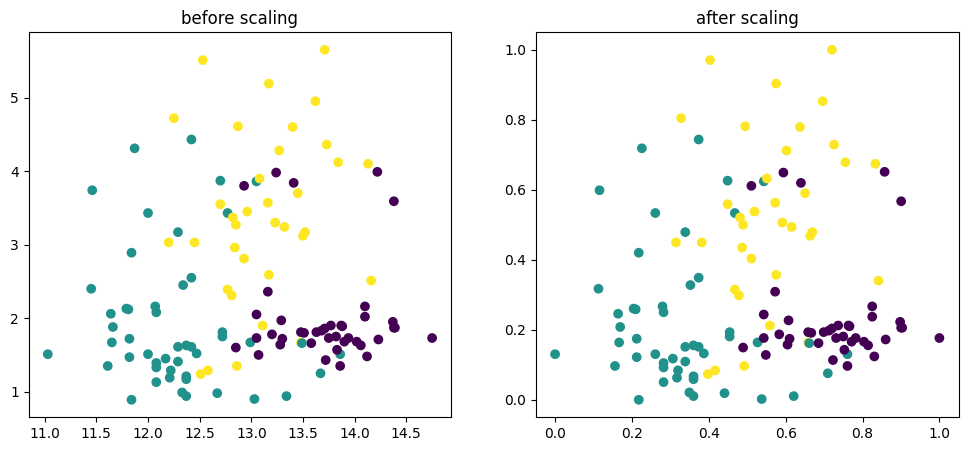

In [12]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],c=y_train)
ax1.set_title("before scaling")
ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic acid'],c=y_train)
ax2.set_title("after scaling")
plt.show()

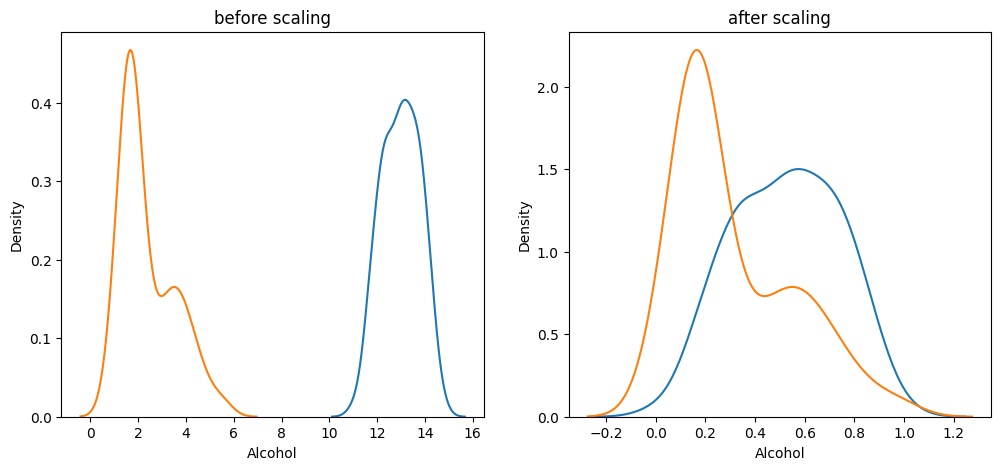

In [13]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title("before scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic acid'],ax=ax1)

#after scaling
ax2.set_title("after scaling")
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2)
plt.show()

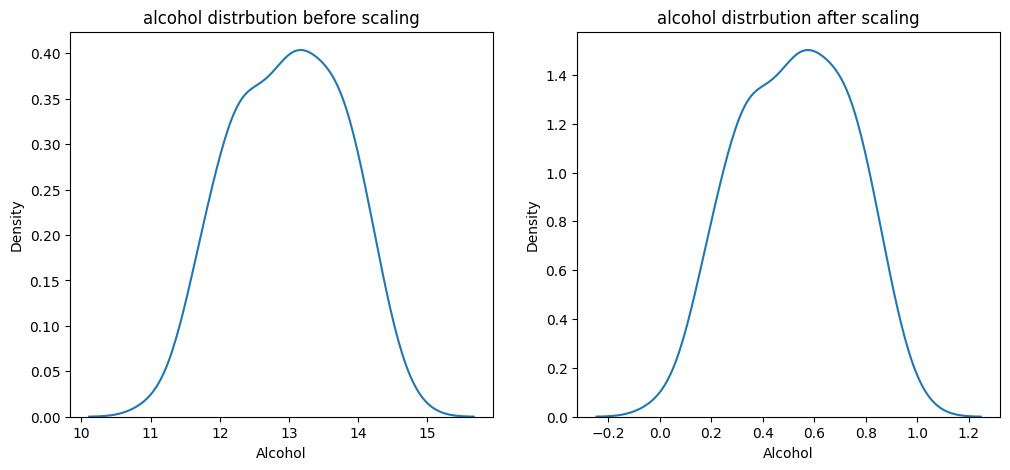

In [14]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title("alcohol distrbution before scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)

#after scaling
ax2.set_title("alcohol distrbution after scaling")
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
plt.show()

<Axes: title={'center': 'malic acid ditribution after scaling'}, xlabel='Malic acid', ylabel='Density'>

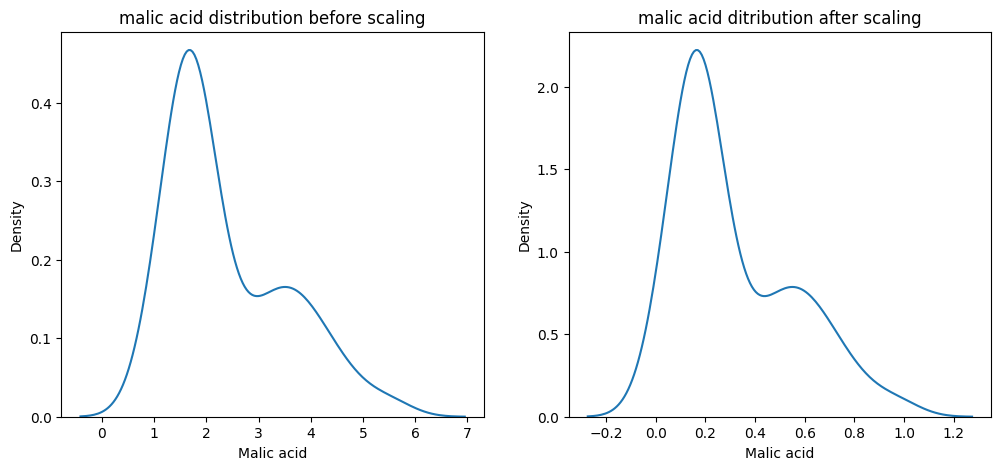

In [15]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title("malic acid distribution before scaling")
sns.kdeplot(X_train['Malic acid'],ax=ax1)

#after scaling
ax2.set_title("malic acid ditribution after scaling")
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2)